# SVM и его ядра
__Суммарное количество баллов: 10__

В этом задании вам не нужно будет реализовать SVM, а научиться его применять.

Примените метод SVM (например, из библиотеки sklearn) для датасета blobs2.

Визуализируйте результат (разбиение плоскости и опорные вектора) при разных вариантах ядер (линейное; полиномиальное степеней 2,3,5; RBF).

In [1]:
from sklearn.svm import SVC 
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

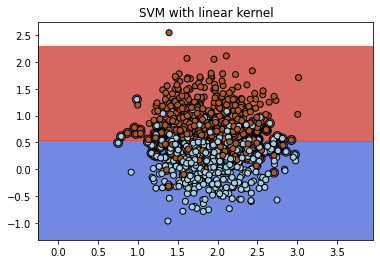

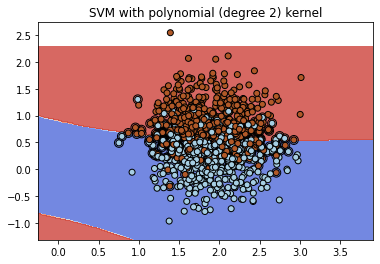

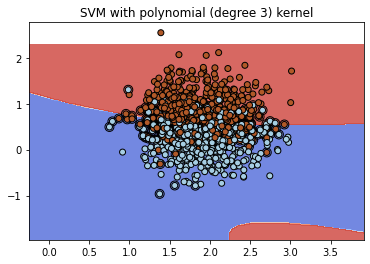

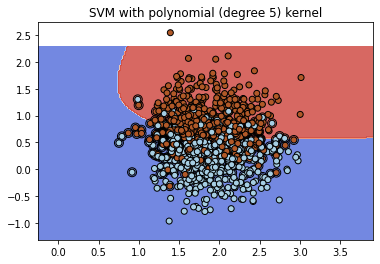

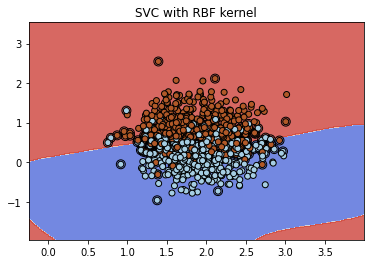

In [2]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy
#
X_blobs2, y_blobs2  = make_blobs(n_samples=1000, random_state=4, center_box=(-2, 2),cluster_std=0.4, centers=2)
#
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def compare_svm(X, y):
    linear_svm = SVC(kernel='linear')
    linear_svm = linear_svm.fit(X, y)

    pol_svm2 = SVC(kernel='poly', degree=2)
    pol_svm2 = pol_svm2.fit(X, y)
    pol_svm3 = SVC(kernel='poly', degree=3)
    pol_svm3 = pol_svm3.fit(X, y)
    pol_svm5 = SVC(kernel='poly', degree=5)
    pol_svm5 = pol_svm5.fit(X, y)

    rbf_svm = SVC(kernel='rbf')
    rbf_svm = rbf_svm.fit(X, y)

    titles = ['SVM with linear kernel',
              'SVM with polynomial (degree 2) kernel',
              'SVM with polynomial (degree 3) kernel',
              'SVM with polynomial (degree 5) kernel',
              'SVC with RBF kernel']

    for i, clf in enumerate((linear_svm, pol_svm2, pol_svm3, pol_svm5, rbf_svm)):
        fig, ax = plt.subplots()
        xx, yy = make_meshgrid(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1])
        plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
        plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
         facecolors="none", zorder=10, edgecolors="k")
        plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
         edgecolors="k")
        ax.set_title(titles[i])
        plt.show()
compare_svm(X_blobs2, y_blobs2)

Протестируйте SVM на датасете spam. Для этой задачи используйте данные x_spam_train и y_spam_train:

1. Выполните загрузку и предобработку файлов x_spam_train и y_spam_train.
2. Разбейте x_spam_train и y_spam_train на x_train, y_train, x_test и y_test для оценки точности работы алгоритма.
3. Посчитайте метрики precision, recall, accuracy для модели SVM. Если необходимо, попробуйте разные наборы параметров для получения лучшего результата.
4. Сравните время работы SVM и Random Forest при близкой точности.

Ответьте на следующие вопросы:
1. Какой нужен препроцессинг данных для моделей?
2. Какая модель делает предсказания лучше? Предположите, почему.

In [3]:
import pandas as pd
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
X = pd.read_csv('../input/homework-svm/x_spam_train.csv')
y = pd.read_csv('../input/homework-svm/y_spam_train.csv')
X = X.join(y.set_index('Id'), on = 'Id')
mask = np.random.rand(len(X)) < 0.8

X_train = X[mask]
X_test = X[~mask]
y_train = X_train['Expected']
y_test = X_test['Expected']
X_test = X_test.drop(columns=['Expected'])
X_train = X_train.drop(columns=['Expected'])

y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
X_test = X_test.to_numpy()
X_train = X_train.to_numpy()

Обучите модель на всех данных из x_spam_train и y_spam_train.
Сделайте submit своего решения и получите значение f1_score не менее 0.6

In [4]:
linear_svm = SVC(kernel='linear', C=1.2)
linear_svm = linear_svm.fit(X_train, y_train)
print('Done linear')
print('linear prediction')
lin_pred = linear_svm.predict(X_test)
print("Precision:" + str(precision_score(y_test, lin_pred)))
print('Recall:' + str(recall_score(y_test, lin_pred)))
print('Accuracy:' + str(accuracy_score(y_test, lin_pred)))
print()

# initially linear prediction gave the best result
#
# linear prediction
# Precision:0.8984962406015038
# Recall:0.8505338078291815
# Accuracy:0.9032258064516129

# linear prediction with c = 2
# Precision:0.8951310861423221
# Recall:0.8505338078291815
# Accuracy:0.9018232819074333

# linear prediction with c = 0.9
# Precision:0.895910780669145
# Recall:0.8576512455516014
# Accuracy:0.9046283309957924

# linear prediction with c = 1.5
# Precision:0.9015151515151515
# Recall:0.8469750889679716
# Accuracy:0.9032258064516129

# linear prediction with c = 1.2
# Precision:0.898876404494382
# Recall:0.8540925266903915
# Accuracy:0.9046283309957924

#with c = 1.3
# Precision:0.8925925925925926
# Recall:0.8576512455516014
# Accuracy:0.9032258064516129

Done linear
linear prediction
Precision:0.9077490774907749
Recall:0.8631578947368421
Accuracy:0.9111111111111111



In [5]:
test =  pd.read_csv('../input/homework-svm/x_spam_test.csv')
submission = pd.DataFrame(columns = ["Id", "Expected"])
submission["Id"] = test["Id"]
submission["Expected"] = linear_svm.predict(test)
submission.to_csv('submission.csv', index=False)